# Credit Scoring Model

In [19]:
import pandas_datareader as wb
import pandas as pd
import datetime as date
import numpy as np
import openpyxl as excel
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import seaborn as sb

### Data uploading

In [62]:
df = pd.read_csv("dzSVM.csv")

### Explanatory Data Analysis

In [23]:
n_samples, n_features = df.shape
print("Количество наблюдений: ", n_samples)
print("Количество атрибутов: ", n_features)

Количество наблюдений:  5960
Количество атрибутов:  13


In [24]:
pd.set_option('display.max_columns', None)
print("Первые пять наблюдений: ")
display(df.head())

Первые пять наблюдений: 


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [25]:
print("Статистика по данным:")
display(df.describe(include='all'))

Статистика по данным:


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199497,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


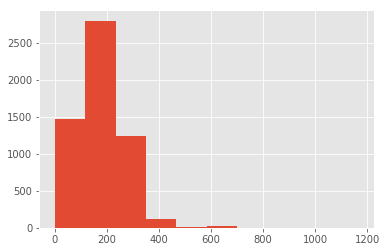

In [26]:
plt.hist(df[~np.isnan(df['CLAGE'])]['CLAGE'])
plt.show();

In [33]:
clage700orMore = df.CLAGE[df.CLAGE>=700].count()
print("%f процента значений CLAGE >= 700 (кредит старше 58 лет), всего %i наблюдения." % \
      ((clage700orMore/df.CLAGE.count())*100, clage700orMore))

0.035386 процента значений CLAGE >= 700 (кредит старше 58 лет), всего 2 наблюдения.


### Data Wrangling

In [35]:
df.drop(df[df.CLAGE >= 700].index, inplace=True)

print("Количество пустых значений:")
print(df.isnull().sum())
df = df.fillna(df.median())

print()

print("Количество пустых значений после заполнения:")
print(df.isnull().sum())

print()

df = df.fillna(df.mode().iloc[0])
print("Количество пустых значений после заполнения категориальных переменных:")
print(df.isnull().sum())

Количество пустых значений:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Количество пустых значений после заполнения:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Количество пустых значений после заполнения категориальных переменных:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [36]:
print("Чистые данные:")
display(df.describe(include='all'))

Чистые данные:


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5958.000000,5958.000000,5958,5958,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4178,2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199228,18608.157100,72994.314233,101521.660967,NaN,NaN,8.758098,0.224404,0.405841,179.107856,1.170527,21.254951,33.999334
std,0.399453,11209.333592,42558.454350,56870.058738,NaN,NaN,7.259876,0.798581,1.079412,81.628614,1.654004,9.945358,7.645367
min,0.000000,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66486.500000,NaN,NaN,3.000000,0.000000,0.000000,117.361832,0.000000,15.000000,30.752203
50%,0.000000,16300.000000,65014.500000,89223.500000,NaN,NaN,7.000000,0.000000,0.000000,173.404166,1.000000,20.000000,34.817611
75%,0.000000,23300.000000,88184.500000,118936.750000,NaN,NaN,12.000000,0.000000,0.000000,227.071977,2.000000,26.000000,37.948576


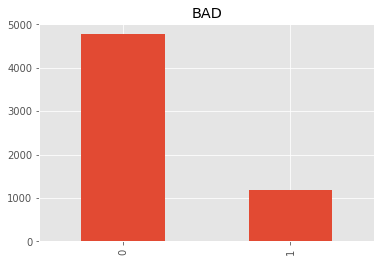

19.922793 процентов заемщиков не выплатили кредит.


In [39]:
df['BAD'].value_counts().plot(kind='bar')
plt.title("BAD")
plt.show();

print("%f процентов заемщиков не выплатили кредит." %((df.BAD[df.BAD==1].count()/df.BAD.count())*100))

### Data Normalization

In [40]:
numeric_features = df.select_dtypes(include=[np.number])
print("Численные атрибуты: ", numeric_features.columns.values)

Численные атрибуты:  ['BAD' 'LOAN' 'MORTDUE' 'VALUE' 'YOJ' 'DEROG' 'DELINQ' 'CLAGE' 'NINQ'
 'CLNO' 'DEBTINC']


In [41]:
print("До нормализации:")
display(numeric_features.describe())

До нормализации:


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
mean,0.199228,18608.157100,72994.314233,101521.660967,8.758098,0.224404,0.405841,179.107856,1.170527,21.254951,33.999334
std,0.399453,11209.333592,42558.454350,56870.058738,7.259876,0.798581,1.079412,81.628614,1.654004,9.945358,7.645367
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66486.500000,3.000000,0.000000,0.000000,117.361832,0.000000,15.000000,30.752203
50%,0.000000,16300.000000,65014.500000,89223.500000,7.000000,0.000000,0.000000,173.404166,1.000000,20.000000,34.817611
75%,0.000000,23300.000000,88184.500000,118936.750000,12.000000,0.000000,0.000000,227.071977,2.000000,26.000000,37.948576
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,649.747104,17.000000,71.000000,203.312149


In [42]:
numeric_features_scaled =(numeric_features-numeric_features.min())/(numeric_features.max()-numeric_features.min())
print("После нормализации:")
display(numeric_features_scaled.describe())

После нормализации:


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
mean,0.199228,0.197164,0.178449,0.110297,0.213612,0.022440,0.027056,0.275658,0.068855,0.299366,0.165073
std,0.399453,0.126231,0.107069,0.067071,0.177070,0.079858,0.071961,0.125631,0.097294,0.140075,0.037701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112613,0.115918,0.068977,0.073171,0.000000,0.000000,0.180627,0.000000,0.211268,0.149061
50%,0.000000,0.171171,0.158374,0.095793,0.170732,0.000000,0.000000,0.266879,0.058824,0.281690,0.169108
75%,0.000000,0.250000,0.216665,0.130836,0.292683,0.000000,0.000000,0.349477,0.117647,0.366197,0.184548
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### EDA of prepared dataset

In [43]:
df[numeric_features.columns.values] = numeric_features_scaled[numeric_features.columns.values]

print("Чистые и нормализованные данные:")
display(df.describe(include='all'))

Чистые и нормализованные данные:


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5958.000000,5958.000000,5958.000000,5958.000000,5958,5958,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,4178,2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199228,0.197164,0.178449,0.110297,NaN,NaN,0.213612,0.022440,0.027056,0.275658,0.068855,0.299366,0.165073
std,0.399453,0.126231,0.107069,0.067071,NaN,NaN,0.177070,0.079858,0.071961,0.125631,0.097294,0.140075,0.037701
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112613,0.115918,0.068977,NaN,NaN,0.073171,0.000000,0.000000,0.180627,0.000000,0.211268,0.149061
50%,0.000000,0.171171,0.158374,0.095793,NaN,NaN,0.170732,0.000000,0.000000,0.266879,0.058824,0.281690,0.169108
75%,0.000000,0.250000,0.216665,0.130836,NaN,NaN,0.292683,0.000000,0.000000,0.349477,0.117647,0.366197,0.184548


In [44]:
df = pd.get_dummies(df,drop_first=True)

print("Первые пять наблюдений после замены категориальных переменных на фиктивные")
display(df.head())
print("Количество наблюдений и атрибутов после замены категориальных переменных на фиктивные:", df.shape)

Первые пять наблюдений после замены категориальных переменных на фиктивные


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1.0,0.000000,0.059869,0.036590,0.256098,0.0,0.000000,0.145236,0.058824,0.126761,0.169108,1,0,1,0,0,0
1,1.0,0.002252,0.171050,0.071234,0.170732,0.0,0.133333,0.187509,0.000000,0.197183,0.169108,1,0,1,0,0,0
2,1.0,0.004505,0.028773,0.010261,0.097561,0.0,0.000000,0.230038,0.058824,0.140845,0.169108,1,0,1,0,0,0
3,1.0,0.004505,0.158374,0.095793,0.170732,0.0,0.000000,0.266879,0.058824,0.281690,0.169108,0,0,1,0,0,0
4,0.0,0.006757,0.240856,0.122655,0.073171,0.0,0.000000,0.143646,0.000000,0.197183,0.169108,1,1,0,0,0,0


Количество наблюдений и атрибутов после замены категориальных переменных на фиктивные: (5958, 17)


In [45]:
print("Чистые и нормализованные данные с фиктивными переменными вместо категориальных:")
display(df.describe(include='all'))

Чистые и нормализованные данные с фиктивными переменными вместо категориальных:


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
count,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000,5958.000000
mean,0.199228,0.197164,0.178449,0.110297,0.213612,0.022440,0.027056,0.275658,0.068855,0.299366,0.165073,0.298758,0.159114,0.447298,0.214166,0.018295,0.032393
std,0.399453,0.126231,0.107069,0.067071,0.177070,0.079858,0.071961,0.125631,0.097294,0.140075,0.037701,0.457752,0.365813,0.497256,0.410277,0.134026,0.177057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.112613,0.115918,0.068977,0.073171,0.000000,0.000000,0.180627,0.000000,0.211268,0.149061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.171171,0.158374,0.095793,0.170732,0.000000,0.000000,0.266879,0.058824,0.281690,0.169108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.250000,0.216665,0.130836,0.292683,0.000000,0.000000,0.349477,0.117647,0.366197,0.184548,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
corr = df.corr()
triangle = corr.abs().where(np.tril(np.ones(corr.shape), k=-1).astype(np.bool))
print("Самая сильная корреляция:")
display(triangle.stack().sort_values(ascending=False)[:7])

Самая сильная корреляция:


VALUE        MORTDUE       0.788746
JOB_ProfExe  JOB_Other     0.469637
JOB_Other    JOB_Office    0.391325
DELINQ       BAD           0.346998
VALUE        LOAN          0.331591
CLNO         MORTDUE       0.319095
DEROG        BAD           0.270296
dtype: float64

### Data splitting

In [48]:
y = df.BAD
X = df.drop('BAD',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

### Model defining

In [49]:
clf = SVC(class_weight='balanced', kernel="rbf")

### Parameters for hypertuning

In [50]:
param_distributions = {"C": sp.stats.uniform(0.5, 5000), "gamma": sp.stats.uniform(0.01, 1)}### 

### Model fitting

In [51]:
random_search = RandomizedSearchCV(clf, param_distributions=param_distributions, n_iter=40, cv=4, 
                                                           scoring="balanced_accuracy", n_jobs=-1)
random_search.fit(X_train, y_train)

model = random_search.best_estimator_
print("Оптимальные параметры: %s, оценка на учебных данных: %0.2f" % (random_search.best_params_, random_search.best_score_))

y_pred = model.predict(X_test)

Оптимальные параметры: {'C': 2309.9755646852273, 'gamma': 0.883661696737279}, оценка на учебных данных: 0.82


### Model evalutaion

In [60]:
print("Результат на тестовых данных: %f" % (100*metrics.balanced_accuracy_score(y_test, y_pred)), end='\n\n')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Матрица неточностей:")
display(pd.DataFrame(cnf_matrix))

Результат на тестовых данных: 80.667802

Матрица неточностей:


,0,1
0,1357,75
1,119,237


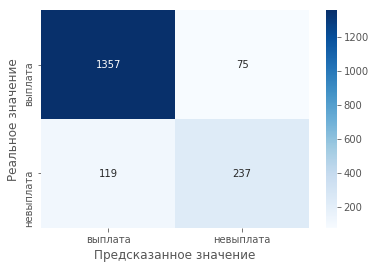

In [61]:
sb.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g',
           xticklabels=["выплата","невыплата"], yticklabels=["выплата","невыплата"])
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')
plt.show();